# Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
df = pd.read_csv('heart_cleveland_upload.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


## Feature Selection

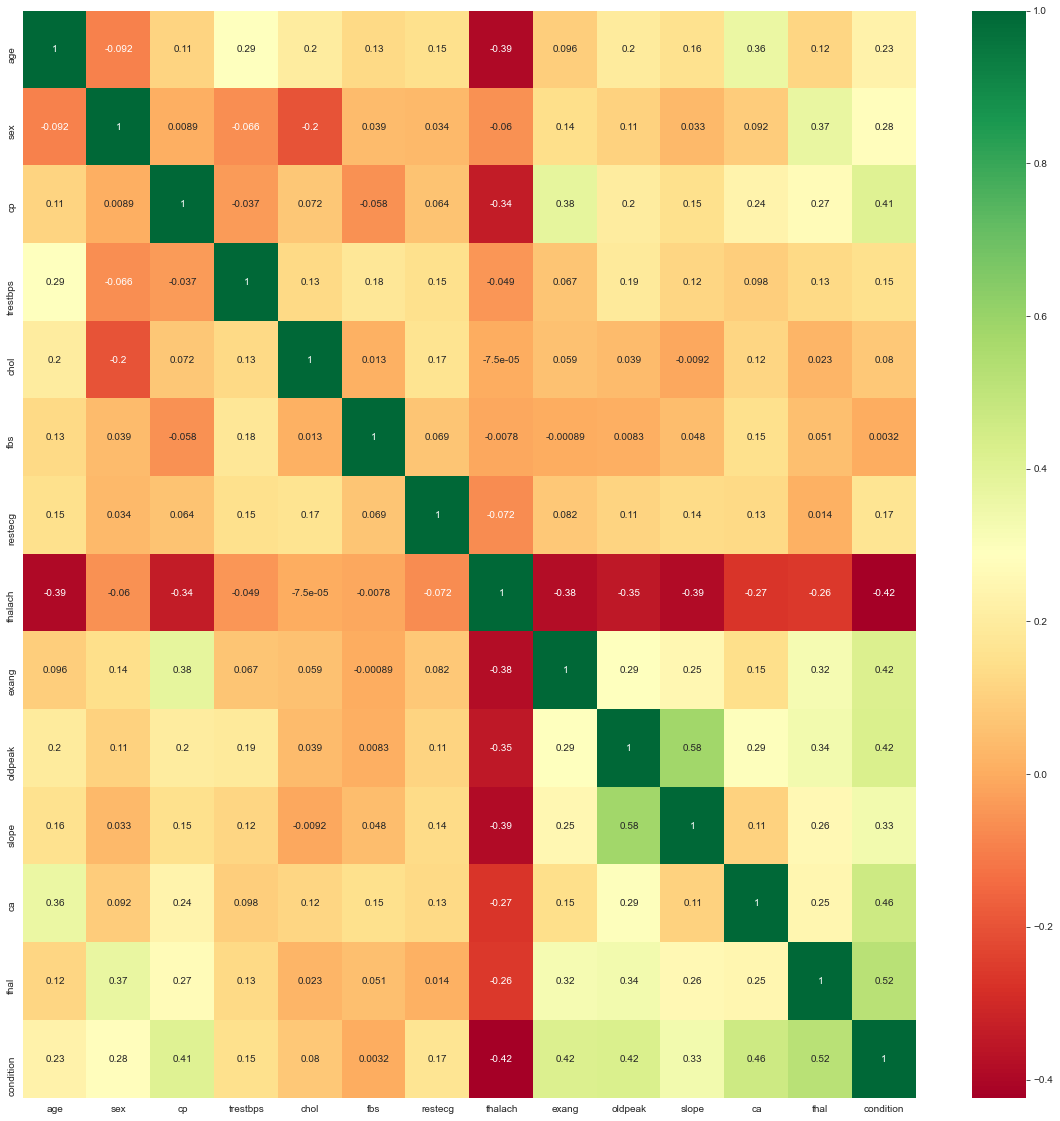

In [26]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

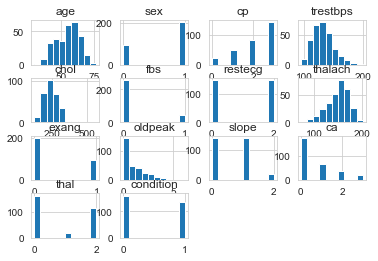

In [110]:
df.hist()

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

<AxesSubplot:xlabel='condition', ylabel='count'>

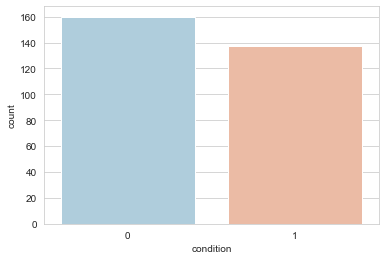

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='condition',data=df,palette='RdBu_r')

### Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [30]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [32]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,1.600302,1.596266,-0.257179,-0.812095,-0.820813,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1.600302,0.468418,-0.160859,0.061157,0.639470,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,1.268242,1.032342,-0.411292,-1.554358,1.326662,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1.157555,0.355633,0.667499,1.065396,0.295874,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,1.046868,-1.223355,-0.700254,-0.244481,0.639470,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0


In [33]:
y = dataset['condition']
X = dataset.drop(['condition'], axis = 1)

In [34]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

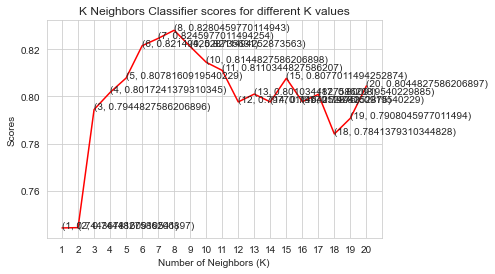

In [35]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors = 8)
score=cross_val_score(knn_classifier,X,y,cv=10)


In [37]:
score.mean()

0.8280459770114943

## Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score1=cross_val_score(randomforest_classifier,X,y,cv=10)

In [100]:
score1.mean()

0.7673563218390804